<a href="https://colab.research.google.com/github/Aashi779/DeepLearningwithPytorch/blob/main/HumanActionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

os.environ["KAGGLE_USERNAME"] = "aashig30"
os.environ["KAGGLE_KEY"] = "4fb263af81c2cd9661a9c70513955401"

!kaggle datasets download meetnagadia/human-action-recognition-har-dataset

human-action-recognition-har-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip human-action-recognition-har-dataset.zip

Archive:  human-action-recognition-har-dataset.zip
replace Human Action Recognition/Testing_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
# to read images data - PIL, opencv libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import torch
from torch import nn
from torchvision import transforms
from torch.utils import data
import torchvision.datasets as datasets

In [5]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


## EXPLORE DATASET

In [6]:
train_path = "Human Action Recognition/train"
test_path = "Human Action Recognition/test"

In [7]:
random_img = train_path + "/" + "Image_234.jpg"


In [8]:
# image object
img = cv2.imread(random_img)

In [9]:
type(img)

numpy.ndarray

In [10]:
img.shape

(281, 179, 3)

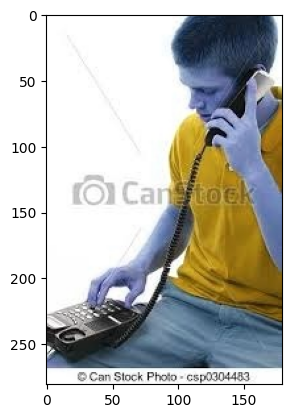

In [11]:
plt.imshow(img)
plt.show()

In [12]:
df = pd.read_csv("Human Action Recognition/Training_set.csv")

In [13]:
df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [14]:
pd.value_counts(df['label'])

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [15]:
class_names = pd.value_counts(df['label']).index

In [16]:
class_names = np.sort(class_names)

In [17]:
class_names

array(['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating',
       'fighting', 'hugging', 'laughing', 'listening_to_music', 'running',
       'sitting', 'sleeping', 'texting', 'using_laptop'], dtype=object)

In [18]:
df.iloc[233]

filename    Image_234.jpg
label             calling
Name: 233, dtype: object

In [19]:
# we need an array to read data
# read all images one by one
# here we don't have categorized data

filenames = df['filename'].values

In [20]:
filenames[:10]

array(['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg',
       'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg',
       'Image_9.jpg', 'Image_10.jpg'], dtype=object)

In [20]:
df['label'][1]

'using_laptop'

In [21]:
# transform = transforms.Compose([transforms.ToTensor()])

# made a function so that can be used for training and testing path both
# and df as argument for training/testing df
def load_data(path, df):
  images_list = []
  labels_list = []
  for i in tqdm(range(len(filenames))):
    # concat train_path with image name
    img_path = path + "/" + filenames[i]
    # fetch image label from data frame of current image
    img_label = df['label'][i]
    # read image using opencv
    img = cv2.imread(img_path)
    # resize image because images might be of different dimensions
    # in order to maintain array, we have to resize all the images in same dimension
    # img = cv2.resize(img, (150,150))
    # img = transform(img)
    # img = img / 255.0
    # store images one by one in your list
    images_list.append(img)
    labels_list.append(img_label)

  images_arr = np.asarray(images_list)
  labels_arr = np.asarray(labels_list)

  return images_arr, labels_arr


In [22]:
train_df = pd.read_csv("Human Action Recognition/Training_set.csv")
#test_df = pd.read_csv("Human Action Recognition/Testing_set.csv")

In [23]:
#test_df.head()

In [24]:
train_images, train_labels = load_data(train_path, train_df)

100%|██████████| 12600/12600 [00:12<00:00, 1042.37it/s]
<ipython-input-21-cfe5266def37>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images_arr = np.asarray(images_list)


In [25]:
train_images.shape

(12600,)

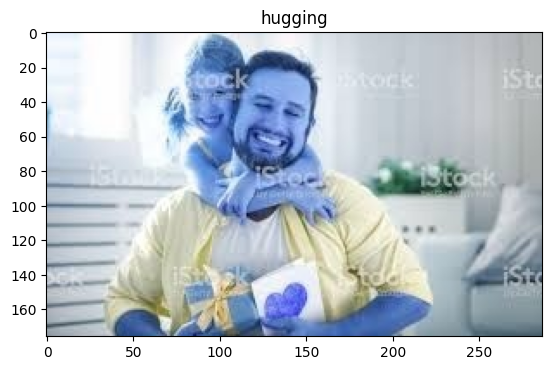

In [26]:
plt.imshow(train_images[300])
plt.title(train_labels[300])
plt.show()

test_images, test_labels = load_data(test_path, test_df) and labels not given, so will divide the training data in test and train data

In [27]:
train_labels[0]

'sitting'

In [28]:
# Inherit Dataset class coming from data package

class Dataset(data.Dataset):
  def __init__(self, images, labels):
    self.transforms = transforms
    self.images = images
    self.labels = labels

  def __len__(self):
    return len(self.images)

  def __getitem__(self, index):
    # loading data - one image at a time
    X = self.images[index]
    X = cv2.resize(img,(227,227))
    y = self.labels[index]
    transform = transforms.Compose([transforms.ToTensor()])
    X = transform(X)
    # X = torch.tensor(X)
    # X = torch.cat((X,X,X),0)
    return X, y

In [29]:
np.unique(train_labels, return_counts = True)

(array(['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating',
        'fighting', 'hugging', 'laughing', 'listening_to_music', 'running',
        'sitting', 'sleeping', 'texting', 'using_laptop'], dtype='<U18'),
 array([840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840,
        840, 840]))

In [30]:
label = LabelEncoder()
train_labels = label.fit_transform(train_labels)

In [31]:
np.unique(train_labels, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840,
        840, 840]))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size = 0.25)

In [33]:
x_train.shape

(9450,)

In [34]:
x_test.shape

(3150,)

In [35]:
params = {"batch_size":32, "shuffle":True}

training_set = Dataset(x_train, y_train)
training_generator = data.DataLoader(training_set, **params)

test_set = Dataset(x_test, y_test)
test_generator = data.DataLoader(test_set, **params)

In [36]:
# Normalization
# x_train, x_test = x_train/255.0, x_test/255.0

In [37]:

x_train[0][0][0]

array([4, 5, 1], dtype=uint8)

In [38]:
class AlexNet(nn.Module):
  def __init__(self, num_classes=15):
    super().__init__()
    self.cnn_blocks = nn.Sequential(
        nn.Conv2d(3, 96, kernel_size=11, stride=4),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(96, 256, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(256, 384, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(384, 384, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(384, 256, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
    )
    self.fcn_blocks = nn.Sequential(
        nn.Linear(1024, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, num_classes),
    )

  def forward(self, x):
    x = self.cnn_blocks(x)
    x = torch.flatten(x,1)
    x = self.fcn_blocks(x)
    return x

In [39]:
model = AlexNet()

In [40]:
model

AlexNet(
  (cnn_blocks): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fcn_blocks): Sequential(
    (0): Linear(in_features=1024, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=4096, out_features=4096, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=4096, out_features=15

In [41]:
def accuracy(y_true, y_pred):
  correct_classification = torch.eq(y_true, y_pred).sum().item()
  acc = (correct_classification / len(y_pred)) * 100
  return acc


In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.001 )

In [43]:
type(x_train)

numpy.ndarray

In [44]:
# x_train, y_train = torch.tensor(x_train), torch.tensor(y_train)
# x_train, y_train = torch.tensor(x_test), torch.tensor(y_test)

In [45]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# Evaluation metric
def accuracy(y_true, y_pred):
  # y_true = 1, y_pred = 1
  # y_true = 0, y_pred = 0
  correct_classification = torch.eq(y_true, y_pred).sum().item()
  acc = (correct_classification / len(y_pred)) * 100
  return acc

def train_step(epoch, model, data, loss_fn, optimizer):
  train_loss, train_acc = 0,0
  model.to(device)

  for batch, (X, y) in enumerate(data):
    X,y = X.to(device), y.to(device)

    # Feedforward - it calls forward method inside Model Class
    y_pred = model(X)
    # Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy(y, y_pred.argmax(dim=1))

    # Backpropagate
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data)
  train_acc /= len(data)
  train_acc_history.append(train_acc)
  train_loss_history.append(train_loss)
  print(f"Epoch : {epoch} | Train Loss : {train_loss:.3f} |  Train Acc : {train_acc:.3f}")


def test_step(epoch, model, data, loss_fn, optimizer):
  test_loss, test_acc = 0,0
  model.to(device)
  model.to(eval)

  with torch.inference_mode():
    for batch, (X, y) in enumerate(data):
      X,y = X.to(device), y.to(device)

      # Feedforward - it calls forward method inside Model Class
      y_pred = model(X)
      # Calculate loss
      loss = loss_fn(y_pred, y)
      test_loss += loss
      test_acc += accuracy(y, y_pred.argmax(dim=1))

    test_loss /= len(data)
    test_acc /= len(data)
    print(f"Epoch : {epoch} | Test Loss : {test_loss:.3f} |  Test Acc : {test_acc:.3f}")

In [46]:
model = AlexNet().to(device)
model.to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)
loss_function = nn.CrossEntropyLoss()

train_acc_history = []
train_loss_history = []

epochs = 5

for epoch in tqdm(range(epochs)):
  train_step(epoch, model, training_generator, loss_function, optimizer)
  # test_step(epoch, model, test_generator, loss_function, optimizer)

  0%|          | 0/20 [00:07<?, ?it/s]


KeyboardInterrupt: ignored